In [ ]:
print('M.Irfansyah_2106701255_B_TugasAkhirPrakSainsData')

M.Irfansyah_2106701255_B_TugasAkhirPrakSainsData


# 1 )
Buatlah clustering untuk menyegmentasikan pelanggan menggunakan metode-metode
clustering yang telah di ajarkan di lab. Tentukan jumlah cluster terbaik, visualisasikan cluster
yang terbentuk, dan interpretasikan hasilnya, jangan lupa lakukan data cleaning dan
preprocessing jika diperlukan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

## Preprocecing

In [ ]:
marketing = pd.read_excel('marketing.xlsx')
marketing


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Datacleaning

In [ ]:
marketing.drop('ID', axis=1, inplace=True) # menghapus kolom yang dirasa tidak memiliki hubungan dengan clustering
marketing

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
marketing.isna().sum()# menghitung jumlah data null

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
marketing = marketing.dropna() # melakukan drop yang mengandung null
marketing.isna().sum() # memeriksa kembali apakah masih ada null

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
marketing.duplicated().sum() # menghitung apakah ada yang nilai duplikat

182

In [ ]:
marketing = marketing.drop_duplicates() # melakukan drop yang mengandung null
marketing.duplicated().sum() # memeriksa kembali apakah ada yang nilai duplikat

0

In [ ]:
#menghapus kolom yang tidak berhubungan secara langsung dengan perilaku konsumen
col_to_drop=['Teenhome','Kidhome','Year_Birth','Marital_Status','Dt_Customer','Education','Z_CostContact','Z_Revenue']
marketing.drop(col_to_drop,axis=1,inplace=True)
marketing

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,666666.0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
marketing.isna().sum()

Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [ ]:
marketing.duplicated().sum()

4

In [ ]:
marketing = marketing.drop_duplicates() # melakukan drop yang mengandung null
marketing.duplicated().sum() # memeriksa kembali apakah ada yang nilai duplikat

0

In [ ]:
#memisahkan data numerik dan kategorik
Kategori_col=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2','Complain','Response']
Numerik_col=list(set(marketing.columns)-set(Kategori_col))

In [ ]:
Numerik_features=marketing.drop(Kategori_col,axis=1)
Kategorik_features=marketing.drop(Numerik_col,axis=1)

In [ ]:
#define IQR to remove data outlier
Q1 = Numerik_features.quantile(q=.25)
Q3 = Numerik_features.quantile(q=.75)
IQR = Q3 - Q1
print(IQR)

Income                 33063.75
Recency                   50.00
MntWines                 483.50
MntFruits                 31.00
MntMeatProducts          214.00
MntFishProducts           47.00
MntSweetProducts          33.00
MntGoldProds              47.00
NumDealsPurchases          2.00
NumWebPurchases            4.00
NumCatalogPurchases        4.00
NumStorePurchases          5.00
NumWebVisitsMonth          4.00
dtype: float64


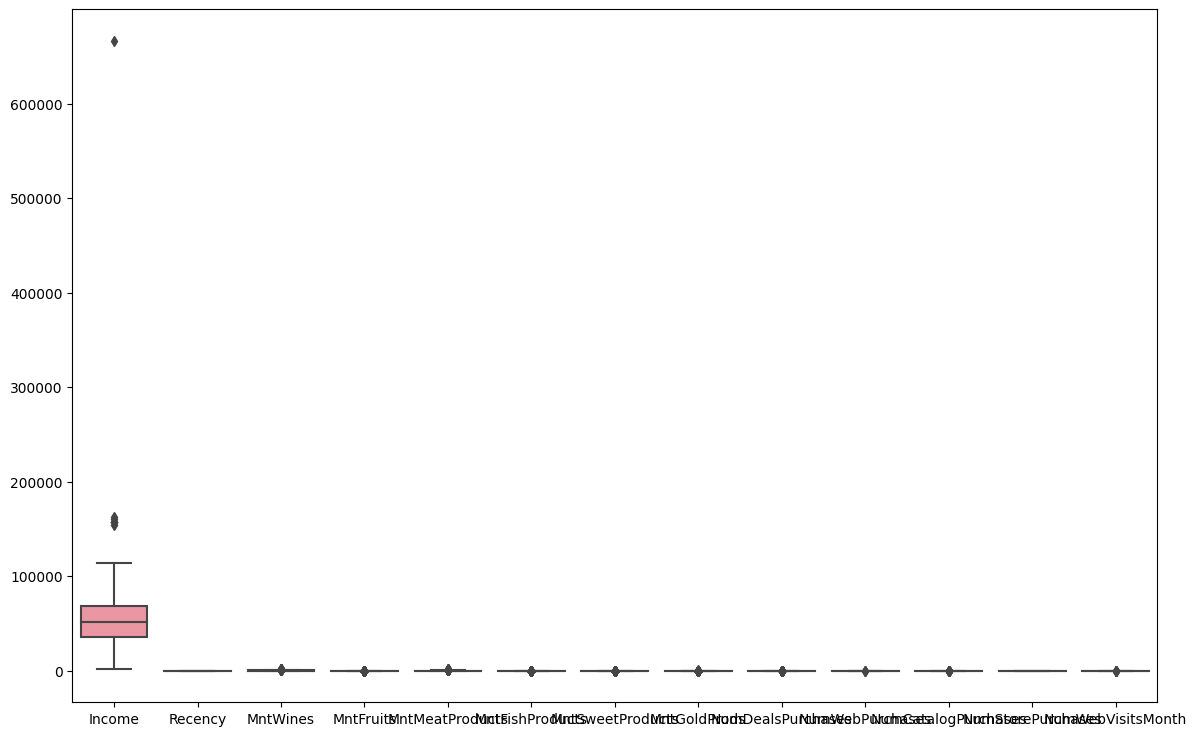

In [ ]:
plt.figure(figsize=(14,9))
sns.boxplot(data=Numerik_features)
plt.show()

In [ ]:
# Menghapus outlier berdasarkan IQR
Numerik_features = Numerik_features[~((Numerik_features<(Q1-1.5*IQR)) | (Numerik_features>(Q3+1.5*IQR)))]
Numerik_features

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,58,635.0,NaN,546.0,NaN,NaN,88.0,3.0,8.0,10.0,4,7.0
1,46344.0,38,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2,5.0
2,71613.0,26,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10,4.0
3,26646.0,26,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4,6.0
4,58293.0,94,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,NaN,23,9.0,14.0,18.0,8.0,1.0,12.0,4.0,3.0,1.0,3,6.0
2235,61223.0,46,709.0,43.0,182.0,42.0,NaN,NaN,2.0,9.0,3.0,4,5.0
2237,56981.0,91,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13,6.0
2238,69245.0,8,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10,3.0


In [ ]:
Numerik_features.isna().sum()

Income                   8
Recency                  0
MntWines                32
MntFruits              222
MntMeatProducts        172
MntFishProducts        201
MntSweetProducts       219
MntGoldProds           184
NumDealsPurchases       76
NumWebPurchases          3
NumCatalogPurchases     22
NumStorePurchases        0
NumWebVisitsMonth        8
dtype: int64

In [ ]:
lr=LinearRegression()
imp_mean = IterativeImputer(random_state=42,n_nearest_features=None,estimator=lr,max_iter=500)
imputed_data=imp_mean.fit_transform(Numerik_features)
Numerik_features=pd.DataFrame(imputed_data,columns=Numerik_features.columns,index=Numerik_features.index)
Numerik_features

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.000000,58.0,635.0,43.821609,546.0,78.802459,51.071649,88.000000,3.0,8.0,10.0,4.0,7.0
1,46344.000000,38.0,11.0,1.000000,6.0,2.000000,1.000000,6.000000,2.0,1.0,1.0,2.0,5.0
2,71613.000000,26.0,426.0,49.000000,127.0,111.000000,21.000000,42.000000,1.0,8.0,2.0,10.0,4.0
3,26646.000000,26.0,11.0,4.000000,20.0,10.000000,3.000000,5.000000,2.0,2.0,0.0,4.0,6.0
4,58293.000000,94.0,173.0,43.000000,118.0,46.000000,27.000000,15.000000,5.0,5.0,3.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,35811.658603,23.0,9.0,14.000000,18.0,8.000000,1.000000,12.000000,4.0,3.0,1.0,3.0,6.0
2235,61223.000000,46.0,709.0,43.000000,182.0,42.000000,25.526289,52.630753,2.0,9.0,3.0,4.0,5.0
2237,56981.000000,91.0,908.0,48.000000,217.0,32.000000,12.000000,24.000000,1.0,2.0,3.0,13.0,6.0
2238,69245.000000,8.0,428.0,30.000000,214.0,80.000000,30.000000,61.000000,2.0,6.0,5.0,10.0,3.0


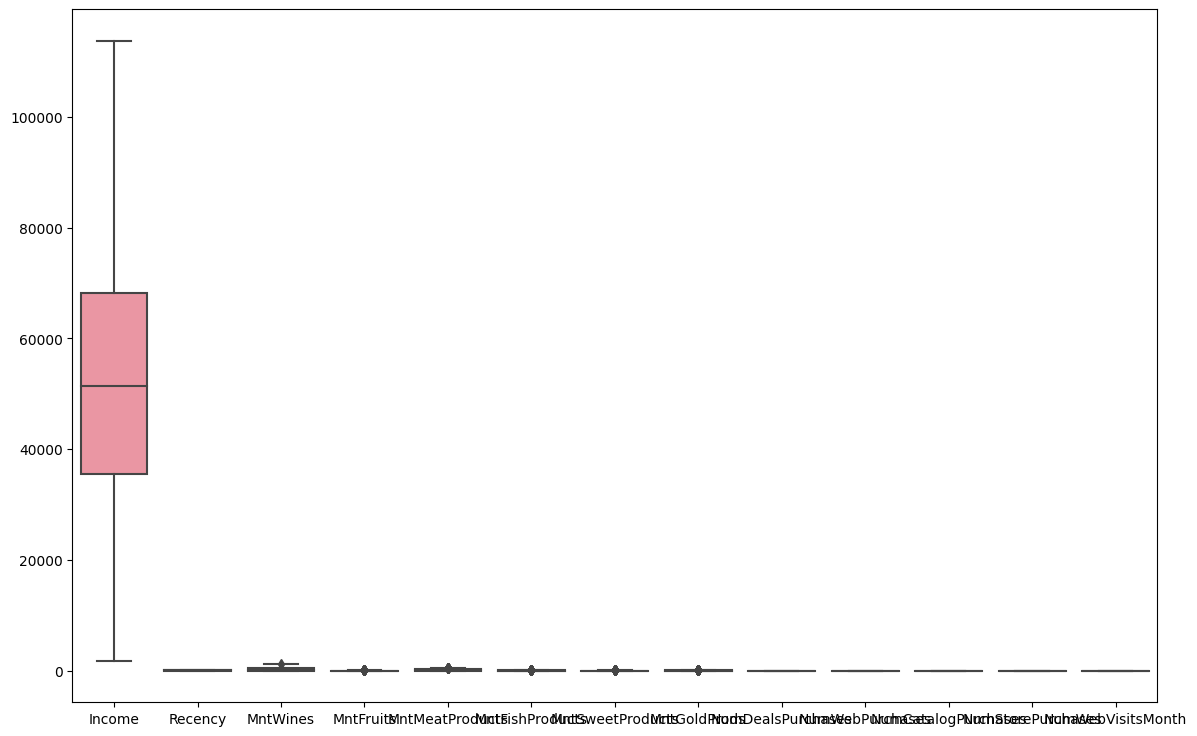

In [ ]:
plt.figure(figsize=(14,9))
sns.boxplot(data=Numerik_features)
plt.show()

In [ ]:
#menghapus data kategorik dari dataset karena KMeans hanya bisa menerima data numerik
marketing=Numerik_features
marketing

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.000000,58.0,635.0,43.821609,546.0,78.802459,51.071649,88.000000,3.0,8.0,10.0,4.0,7.0
1,46344.000000,38.0,11.0,1.000000,6.0,2.000000,1.000000,6.000000,2.0,1.0,1.0,2.0,5.0
2,71613.000000,26.0,426.0,49.000000,127.0,111.000000,21.000000,42.000000,1.0,8.0,2.0,10.0,4.0
3,26646.000000,26.0,11.0,4.000000,20.0,10.000000,3.000000,5.000000,2.0,2.0,0.0,4.0,6.0
4,58293.000000,94.0,173.0,43.000000,118.0,46.000000,27.000000,15.000000,5.0,5.0,3.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,35811.658603,23.0,9.0,14.000000,18.0,8.000000,1.000000,12.000000,4.0,3.0,1.0,3.0,6.0
2235,61223.000000,46.0,709.0,43.000000,182.0,42.000000,25.526289,52.630753,2.0,9.0,3.0,4.0,5.0
2237,56981.000000,91.0,908.0,48.000000,217.0,32.000000,12.000000,24.000000,1.0,2.0,3.0,13.0,6.0
2238,69245.000000,8.0,428.0,30.000000,214.0,80.000000,30.000000,61.000000,2.0,6.0,5.0,10.0,3.0


## K Means Clustering

In [ ]:
X = marketing[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth', 'Recency']].values
X


array([[635.        ,  43.82160879, 546.        , ...,   4.        ,
          7.        ,  58.        ],
       [ 11.        ,   1.        ,   6.        , ...,   2.        ,
          5.        ,  38.        ],
       [426.        ,  49.        , 127.        , ...,  10.        ,
          4.        ,  26.        ],
       ...,
       [908.        ,  48.        , 217.        , ...,  13.        ,
          6.        ,  91.        ],
       [428.        ,  30.        , 214.        , ...,  10.        ,
          3.        ,   8.        ],
       [ 84.        ,   3.        ,  61.        , ...,   4.        ,
          7.        ,  40.        ]])

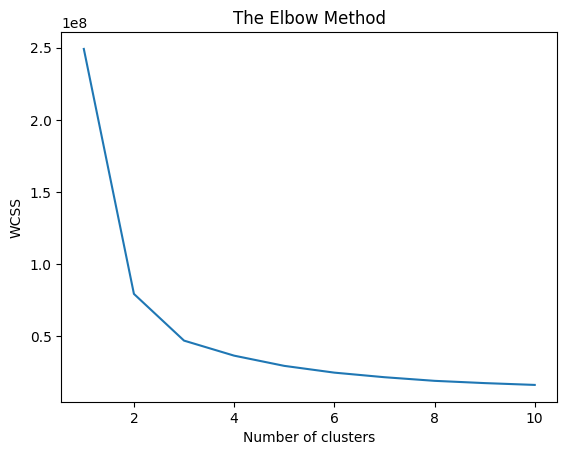

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss

[249158096.1118484,
 79233708.67453134,
 46827588.84457417,
 36397368.70792216,
 29315815.30600718,
 24620211.110965688,
 21443840.263947453,
 18930101.88205861,
 17359747.16498535,
 16095919.817793407]

In [ ]:
import sklearn.metrics as metrics
for i in range(2,11):
  labels=KMeans(n_clusters=i,random_state=200).fit(X).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6128159829968152
Silhouette score for k(clusters) = 3 is 0.5549922127153617
Silhouette score for k(clusters) = 4 is 0.4846236882609467
Silhouette score for k(clusters) = 5 is 0.4776212819179541
Silhouette score for k(clusters) = 6 is 0.47418335070715173
Silhouette score for k(clusters) = 7 is 0.45564282673924295
Silhouette score for k(clusters) = 8 is 0.4528849032908911
Silhouette score for k(clusters) = 9 is 0.44923848627942253
Silhouette score for k(clusters) = 10 is 0.41508375201340336


In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

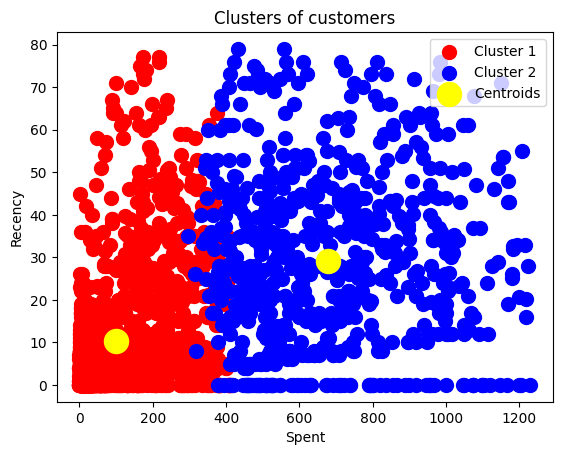

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Spent')
plt.ylabel('Recency')
plt.legend()
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[101.04661569,  10.31496616,  62.71398203,  15.52731831,
         10.65331889,  24.59321725,   2.19414486,   3.05311745,
          1.31052135,   4.40252039,   5.86216467,  48.4158636 ],
       [678.26660388,  29.03434164, 262.95882879,  45.25952193,
         30.70531475,  47.45017755,   1.92994087,   6.05873715,
          5.07341503,   8.52276065,   4.13656388,  49.83406755]])

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

Berdasarkan grafik Cluster of customers yang telah dibuat yang mana sumbu x menjelaskan mengenai spent dan sumbu y menjelaskan mengenai recency.Cluster yang berwarna merah dengan centroid berada diantara 0 dan 200 di sumbu x  dan  5 dan 15 hari di sumbu y  menunjukkan bahwa cluster merah merupakan customer yang memiliki spent yang terbilang rendah (0-500), tetapi customer belanja terakhir 5- 15 hari yang lalu yang menunjukkan bahwa mereka low spender tapi high buying habit.Sedangkan untuk cluster biru, customer memiliki spent yang tinggi dan waktu belanja terakhir bervariatif

#2)
Buatlah neural network sederhana yang serupa dengan regresi logistik dengan menggunakan Tensorflow (TANPA mengunakaan framework keras). Tentunya, sebelum dapat dibangun model machine learningnya, kalian harus melakukan preprocessing data terlebih dahulu.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

##Preprocecing

In [ ]:
titanic =  pd.read_csv('train (1).csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Data Cleaning

In [ ]:
titanic.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True) # menghapus kolom yang tidak berhubungan dengan proses perhitungan
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
titanic.isna().sum()# menghitung jumlah data null

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
titanic.drop('Cabin', axis=1, inplace=True) # menghapus kolom yang mengandung NaN
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
titanic = titanic.drop_duplicates() # melakukan drop yang mengandung duplicat
titanic.duplicated().sum() # memeriksa kembali apakah ada yang nilai duplikat

0

In [ ]:
#imputasi kolom embarked menggunakan modus/most frequent
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
embarked_imputed=imp_mode.fit_transform(np.array(titanic['Embarked']).reshape(-1,1))
titanic['Embarked']=embarked_imputed
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
LA=LabelEncoder()

In [ ]:
Sex_encoded=LA.fit_transform(titanic['Sex'])
Sex_encoded


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
Embarked_encoded=LA.fit_transform(titanic['Embarked'])
Embarked_encoded

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2,
       1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1,

In [ ]:
titanic['Sex']=Sex_encoded
titanic['Embarked']=Embarked_encoded
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [ ]:
#imputasi kolom Age menggunakan linear regression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
imp_mean = IterativeImputer(random_state=42,n_nearest_features=None,estimator=lr,max_iter=500)
imputed_titanic=imp_mean.fit_transform(titanic)
imputed_titanic=np.round(imputed_titanic)
titanic=pd.DataFrame(imputed_titanic,columns=titanic.columns,index=titanic.index)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,8.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0,2.0
...,...,...,...,...,...,...,...,...
885,0.0,3.0,0.0,39.0,0.0,5.0,29.0,1.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0,2.0
888,0.0,3.0,0.0,24.0,1.0,2.0,23.0,2.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0,0.0


In [ ]:
corr=titanic.corr()
corr_target=corr['Survived']
corr_target

Survived    1.000000
Pclass     -0.336244
Sex        -0.513615
Age        -0.093870
SibSp      -0.037597
Parch       0.069669
Fare        0.246500
Embarked   -0.155701
Name: Survived, dtype: float64

## Model

In [ ]:
#memilih fitur dengan korelasi pearson >=0.10
good_col=[]
for i in corr_target.index:
    if np.abs(corr_target[i]) >= 0.1:
        good_col.append(i)
good_col

['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked']

In [ ]:
col_to_drop=list(set(titanic.columns)-set(good_col))
col_to_drop


['Age', 'Parch', 'SibSp']

In [ ]:
titanic.drop(col_to_drop,axis=1,inplace=True)
titanic

,Survived,Pclass,Sex,Fare,Embarked
0,0.0,3.0,1.0,7.0,2.0
1,1.0,1.0,0.0,71.0,0.0
2,1.0,3.0,0.0,8.0,2.0
3,1.0,1.0,0.0,53.0,2.0
4,0.0,3.0,1.0,8.0,2.0
...,...,...,...,...,...
885,0.0,3.0,0.0,29.0,1.0
887,1.0,1.0,0.0,30.0,2.0
888,0.0,3.0,0.0,23.0,2.0
889,1.0,1.0,1.0,30.0,0.0


In [ ]:
X=titanic.drop(['Survived'],axis=1)
X=X.to_numpy()
X=X.astype('float32')
Y=titanic['Survived']
Y=Y.to_numpy()
Y=Y.astype('float32')

In [ ]:
X

array([[ 3.,  1.,  7.,  2.],
       [ 1.,  0., 71.,  0.],
       [ 3.,  0.,  8.,  2.],
       ...,
       [ 3.,  0., 23.,  2.],
       [ 1.,  1., 30.,  0.],
       [ 3.,  1.,  8.,  1.]], dtype=float32)

In [ ]:
Y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0.

In [ ]:
# Creating the linear classifier variables
input_dim = 4
output_dim = 1
W1 = tf.Variable(tf.random.normal(shape = (input_dim, 3*input_dim)))
b1 = tf.Variable(tf.random.normal(shape = (3*input_dim,)))
W2=tf.Variable(tf.random.normal(shape = (3*input_dim, 2*input_dim)))
b2=tf.Variable(tf.random.normal(shape = (2*input_dim,)))
W3=tf.Variable(tf.random.normal(shape = (2*input_dim, input_dim)))
b3=tf.Variable(tf.random.normal(shape = (input_dim,)))
W4=tf.Variable(tf.random.normal(shape = (input_dim, output_dim)))
b4=tf.Variable(tf.random.normal(shape = (output_dim,)))

In [ ]:
# the forward pass
def model(inputs):
    layer1=tf.keras.activations.relu(tf.matmul(inputs, W1) + b1)
    layer2=tf.math.sigmoid(tf.matmul(layer1, W2) + b2)
    layer3=tf.math.sigmoid(tf.matmul(layer2, W3) + b3)
    return tf.math.sigmoid(tf.matmul(layer3, W4) + b4)


def entropy_loss(targets, predictions):
    per_sample_losses = - targets * tf.math.log(predictions) - (1 - targets) * tf.math.log(1 - predictions)
    return tf.reduce_mean(per_sample_losses)


# training step
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = entropy_loss(targets, predictions)
        grad_loss_wrt_W4, grad_loss_wrt_b4,grad_loss_wrt_W3, grad_loss_wrt_b3,grad_loss_wrt_W2, grad_loss_wrt_b2,grad_loss_wrt_W1, grad_loss_wrt_b1 = tape.gradient(loss, [ W4,b4, W3, b3, W2, b2, W1, b1])
        W4.assign_sub(learning_rate * grad_loss_wrt_W4)
        b4.assign_sub(learning_rate * grad_loss_wrt_b4)
        W3.assign_sub(learning_rate * grad_loss_wrt_W3)
        b3.assign_sub(learning_rate * grad_loss_wrt_b3)
        W2.assign_sub(learning_rate * grad_loss_wrt_W2)
        b2.assign_sub(learning_rate * grad_loss_wrt_b2)
        W1.assign_sub(learning_rate * grad_loss_wrt_W1)
        b1.assign_sub(learning_rate * grad_loss_wrt_b1)
        return loss

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
# Inisialisasi SMOTE
sm=SMOTE(random_state=42)
scaler=MinMaxScaler()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X_val,X_test,Y_val,Y_test=train_test_split(X_test,Y_test,test_size=0.5,random_state=42)
X_train=scaler.fit_transform(X_train)
X_train,Y_train=sm.fit_resample(X_train, Y_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [ ]:
#training model menggunakan 100 epochs
for step in range(100):
    loss = training_step(X_train, Y_train)
    print(f"Loss at step {step}: {loss}")

Loss at step 0: 0.7026219964027405
Loss at step 1: 0.7020755410194397
Loss at step 2: 0.7015872597694397
Loss at step 3: 0.7011507153511047
Loss at step 4: 0.700760006904602
Loss at step 5: 0.7004103064537048
Loss at step 6: 0.7000970840454102
Loss at step 7: 0.6998165249824524
Loss at step 8: 0.6995647549629211
Loss at step 9: 0.6993390321731567
Loss at step 10: 0.6991355419158936
Loss at step 11: 0.6989531517028809
Loss at step 12: 0.6987885236740112
Loss at step 13: 0.6986407041549683
Loss at step 14: 0.6985069513320923
Loss at step 15: 0.698386013507843
Loss at step 16: 0.698276698589325
Loss at step 17: 0.6981775760650635
Loss at step 18: 0.6980876326560974
Loss at step 19: 0.6980057954788208
Loss at step 20: 0.6979310512542725
Loss at step 21: 0.697862982749939
Loss at step 22: 0.6978004574775696
Loss at step 23: 0.6977433562278748
Loss at step 24: 0.6976907849311829
Loss at step 25: 0.6976425051689148
Loss at step 26: 0.697597324848175
Loss at step 27: 0.6975559592247009
Loss at

In [ ]:
Y_pred= model(X_test)
Y_pred=Y_pred.numpy()
Y_pred

array([[0.47074345],
       [0.5059752 ],
       [0.50463057],
       [0.47074345],
       [0.46051675],
       [0.50526273],
       [0.48180395],
       [0.5048819 ],
       [0.4606006 ],
       [0.46053037],
       [0.46224448],
       [0.46050325],
       [0.5049646 ],
       [0.5063948 ],
       [0.4965381 ],
       [0.5019496 ],
       [0.46051675],
       [0.5787565 ],
       [0.4606593 ],
       [0.534367  ],
       [0.51142895],
       [0.46051675],
       [0.5383632 ],
       [0.5335314 ],
       [0.50921446],
       [0.55081046],
       [0.4965381 ],
       [0.49636492],
       [0.5048819 ],
       [0.5573657 ],
       [0.47074345],
       [0.4962578 ],
       [0.482342  ],
       [0.50463057],
       [0.5086529 ],
       [0.49640793],
       [0.50526273],
       [0.51124084],
       [0.597566  ],
       [0.50463057],
       [0.49655998],
       [0.49636492],
       [0.53389513],
       [0.53983855],
       [0.49640793],
       [0.46115965],
       [0.4588049 ],
       [0.541

In [ ]:
Y_pred = np.round(Y_pred)

In [ ]:
f1_score(Y_test, Y_pred)

0.6599999999999999

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluation_parametrics(name,y_val, y_pred):

    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_val, y_pred))
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75        69
         1.0       0.63      0.69      0.66        48

    accuracy                           0.71       117
   macro avg       0.70      0.71      0.70       117
weighted avg       0.71      0.71      0.71       117

--------------------------------------------------------------------------


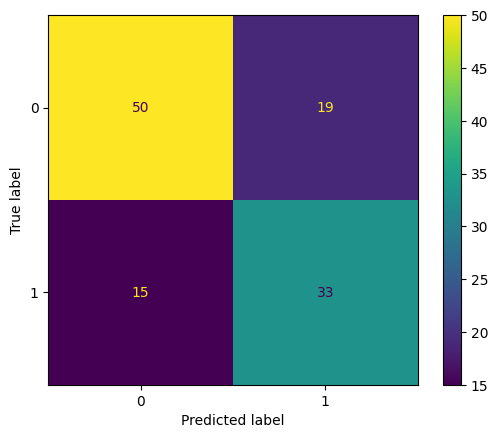

In [ ]:
evaluation_parametrics("Machine Learning - Classification", Y_test, Y_pred)

#3)
Buatlah deep neural network untuk melakukan proses klasifikasi, lakukan
hyperparameter tuning hingga didapat model yang terbaik. Lakukan analisis terhadap accuracy, precision, recall dan f1-score nya (sebelum melakukan training model, jangan lupa untuk melakukan data preprocessing).

In [238]:
!pip install keras-tuner
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bayes_opt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

## Preprocessing

In [ ]:
spotify = pd.read_csv('Spotify Songs Emotion.csv')
spotify

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 25.4 MB


In [ ]:
spotify.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05,277938.000000
mean,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754654e-07,1.179101
std,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.190229e-07,1.021033
min,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.531461e-07,0.000000
50%,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.345459e-07,1.000000
75%,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.449937e-07,2.000000
max,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05,3.000000


## Data Cleaning

In [ ]:
spotify.isna().sum()# menghitung jumlah data null

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64

In [ ]:
spotify.duplicated().sum() # menghitung apakah ada yang nilai duplikat

1678

In [ ]:
spotify.drop_duplicates(inplace=True)
spotify

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


## EDA

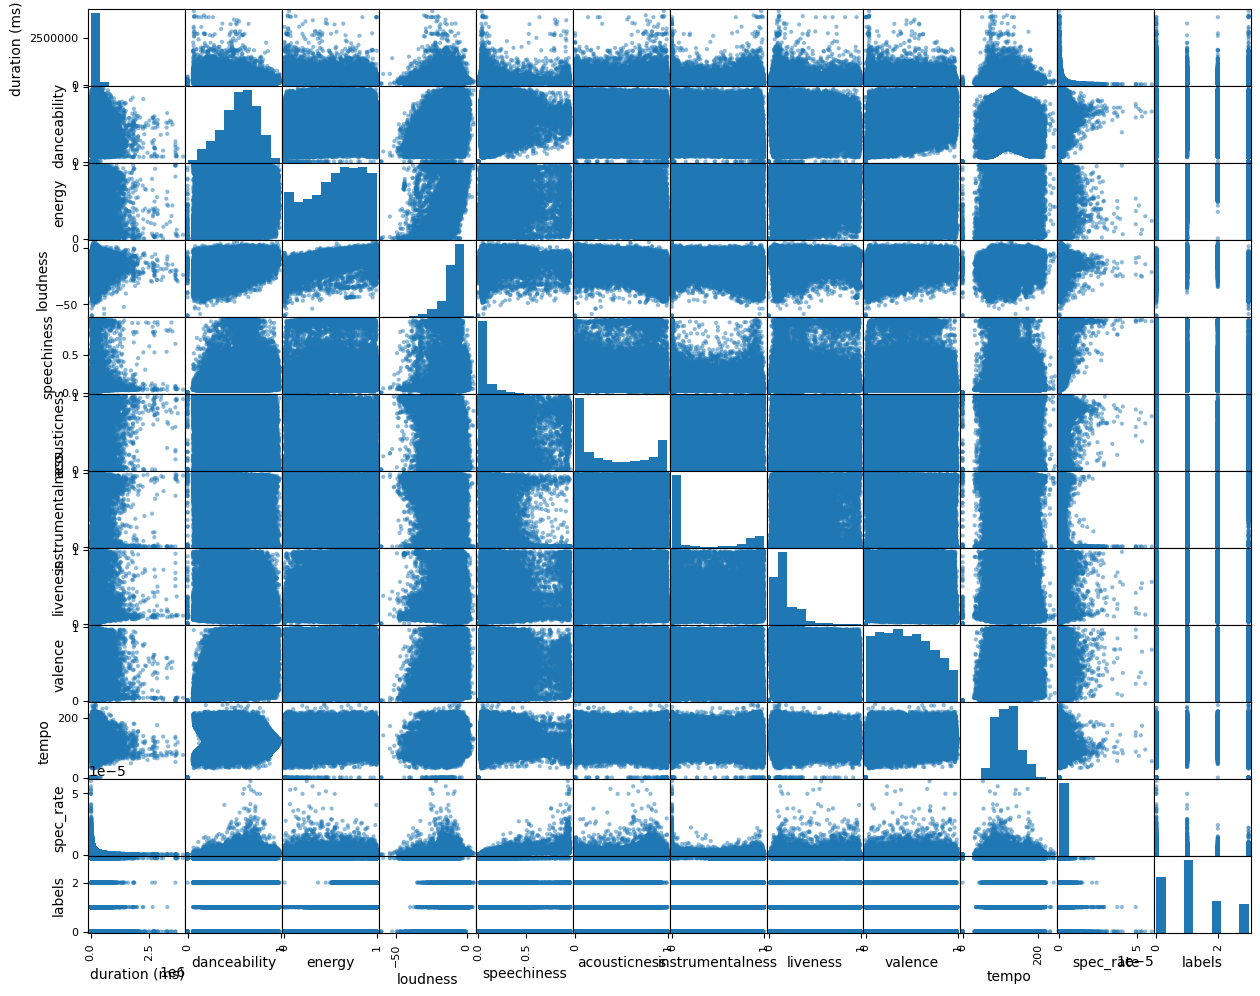

In [ ]:
pd.plotting.scatter_matrix(spotify, figsize=(15,12)) # plot data scatter matrix
plt.show()

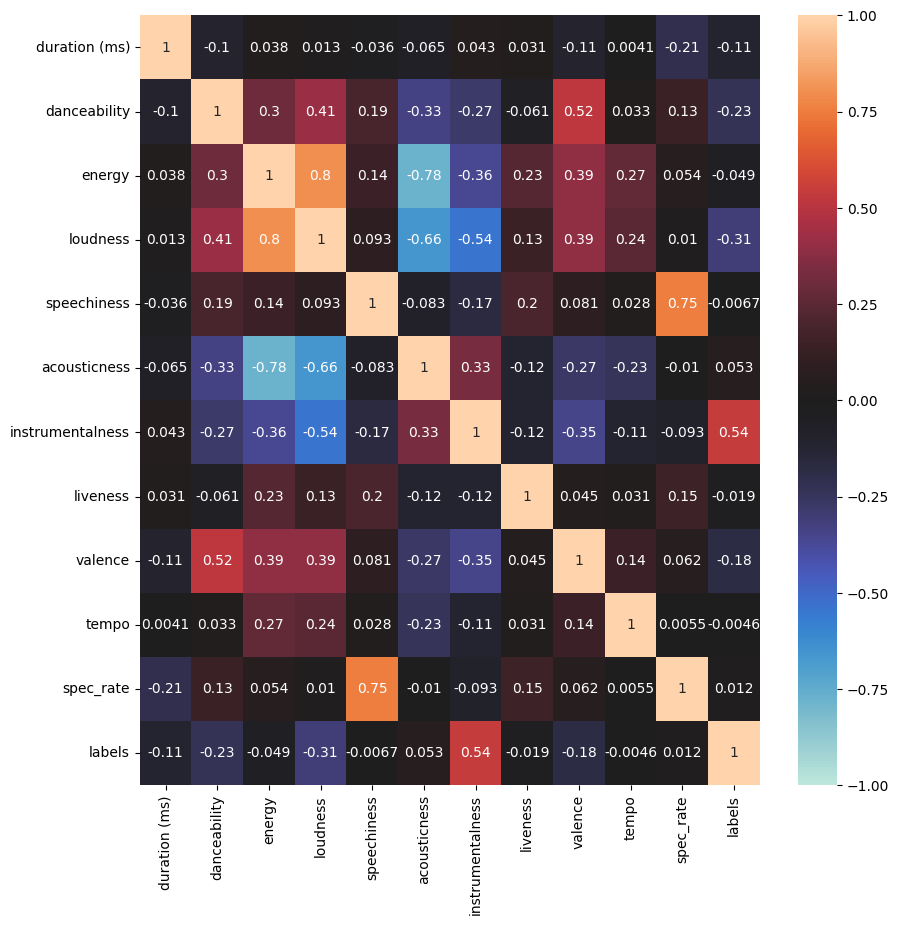

In [ ]:
corr = spotify.corr() # plot data heatmap
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

## Split Data

In [241]:
X = spotify.drop(['labels'], axis=1) # Membagi data menjadi dua bagian
Y = spotify['labels'].copy()

In [255]:
np.random.seed(42) # Melakukan random

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y) # Melakukan labeling pada Y yang telah diperoleh sebelumnya

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Melakukan split data hingga diperoleh X_train, X_test, Y_train dan Y_test

## Model Selection

In [257]:
def create_model(optimizer='adam', activation='relu', neurons=100):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model # Membuat model dengan konsep NN


model = KerasClassifier(build_fn=create_model, verbose=0) # Akan dibuat juga model dari definisi keras


param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid'],
    'neurons': [50, 100, 200]
} # Mendefinisikan  hyperparameters yaitu berupa grid


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train) # Melakukan pengecekan terhadap grid

# Mendapatkan best parameter
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'activation': 'relu', 'neurons': 100, 'optimizer': 'adam'}


## Evaluasi model

In [258]:
# Melakukan evaluasi model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)
Y_pred = label_encoder.inverse_transform(Y_pred)
Y_test = label_encoder.inverse_transform(Y_test)
print("Classification Report:") # Menampilkan clasification report
print(classification_report(Y_test, Y_pred))

2644/2644 [==============================] - 4s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     21147
           1       0.07      0.00      0.00     21200
           2       0.00      0.00      0.00     20992
           3       0.25      1.00      0.40     21244

    accuracy                           0.25     84583
   macro avg       0.08      0.25      0.10     84583
weighted avg       0.08      0.25      0.10     84583

